# TRMM

The dataset used in this notebook is TRMM with daily values (from NASA). The data comes in separate files for each day and thus needs to be concatenated before processing.

Using the filter available on https://disc.gsfc.nasa.gov/SSW/#keywords=TRMM_3B42_Daily%207, the relevant geographical area can be extracted and the daily files downloaded. For the area, paste **5.125,62.375,39.875,97.125** to extract the exact spatial region used in the V. Stolbovas PhD thesis. For the variables, check only **precipitation** and subset the dataset.

If logged in with the earthdata account, the dataset can then be downloaded. Login can be found at https://urs.earthdata.nasa.gov/.

**Resources**

- Official TRMM README
- https://disc.gsfc.nasa.gov/datasets/TRMM_3B42_Daily_7/summary
- https://disc.gsfc.nasa.gov/SSW/#keywords=TRMM_3B42_Daily%207
- https://disc2.gesdisc.eosdis.nasa.gov/opendap/TRMM_L3/TRMM_3B42_Daily.7/
- https://disc.gsfc.nasa.gov/SSW/SSW_URL_List_Downloading_Instructions.html
- https://wiki.earthdata.nasa.gov/display/HDD/Wget+with+URS+Authentication#WgetwithURSAuthentication-Step-by-stepguide

**Citation**

Goddard Earth Sciences Data and Information Services Center(2016), TRMM (TMPA) Precipitation L3 1 day 0.25 degree x 0.25 degree V7, , Goddard Earth Sciences Data and Information Services Center (GES DISC), Accessed [21.08.2017] https://disc.gsfc.nasa.gov/datacollection/TRMM_3B42_Daily_7.html


61.75,4.5,97.75,40.5
- https://giovanni.gsfc.nasa.gov/giovanni/#service=TmAvMp&starttime=1997-12-31T00:00:00Z&endtime=2017-09-29T23:59:59Z&bbox=61.75,4.5,97.75,40.5&data=TRMM_3B42_Daily_7_precipitation&dataKeyword=trmm
- https://disc.sci.gsfc.nasa.gov/datasets?page=1&keywords=TRMM%203B42&start=1920-01-01&end=2016-06-27
- https://disc.sci.gsfc.nasa.gov/data-access

## Dependencies

To get all the dependencies needed for this project, import the corresponding conda environment file:
- **conda-gpu.env** for Tensorflow with GPU support
- **conda.env** for Tensorflow without GPU support

In [1]:
# statistical libraries
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx

# visualization libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly
import plotly.plotly as py
from plotly.graph_objs import Scatter, Layout
import cartopy.crs as ccrs

# import own library functionality
import paths
from TRMM import TRMM
from Visualization import Visualization

# force autoreload of external modules on save
%load_ext autoreload
%autoreload 2
%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)

## Load the dataset

In [2]:
# how many years to load data for
# cannot yet use 2017 as the data for december is not complete
# TODO: extend with 2018 as soon as data is available
YEARS = range(1998, 2013)

# pre-monsoon period
MAM = [3, 4, 5]

# monsoon period
JJAS = [6, 7, 8, 9]

# post-monsoon period
OND = [10, 11, 12]

# run the aggregation algorithm over the dataframes?
# the resulting dataframe would be exorbitantly big otherwise
AGGREGATION_RESOLUTION = 1.75

In [3]:
# load data for the pre-monsoon period (MAM)

mam_df = TRMM.load_dataset(
    YEARS,
    MAM,
    aggregation_resolution=AGGREGATION_RESOLUTION,
    timestamp=True,
    invalidate=False,
    lon_slice=slice(61.125, 97.625),
    lat_slice=slice(4.125, 40.625),
    version='v3')

> Processing: Failure for 1998-04-31 at 00_DATA/TRMM/3B42_Daily.19980431_v3.trmm


KeyboardInterrupt: 

In [13]:
# load data for the monsoon period (JJAS)

jjas_df = TRMM.load_dataset(
    YEARS,
    JJAS,
    aggregation_resolution=AGGREGATION_RESOLUTION,
    timestamp=True,
    invalidate=False,
    lon_slice=slice(61.125, 97.625),
    lat_slice=slice(4.125, 40.625),
    version='v3')

> Loading from cache...


In [14]:
# load data for the post-monsoon period (OND)

ond_df = TRMM.load_dataset(
    YEARS,
    OND,
    aggregation_resolution=AGGREGATION_RESOLUTION,
    timestamp=True,
    invalidate=False,
    lon_slice=slice(61.125, 97.625),
    lat_slice=slice(4.125, 40.625),
    version='v3')

> Loading from cache...


## Exploratory Data Analysis

### Pre-Monsoon (MAM)

In [15]:
mam_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 441 entries, (4.875, 61.875) to (39.875, 96.875)
Columns: 1380 entries, 888710400 to 1338422400
dtypes: float64(1380)
memory usage: 4.6 MB


In [16]:
mam_df.tail()

888710400   888796800   888883200   888969600   \
latitude longitude                                                   
39.875   89.875            0.0    0.000000    2.814044    0.000000   
         91.625            0.0    0.000000    0.963269    1.123311   
         93.375            0.0    0.000000    0.000000    0.290804   
         95.125            0.0    0.715291    0.000000    0.136527   
         96.875            0.0    0.000000    3.240613    0.000000   

                    889056000   889142400   889228800   889315200   \
latitude longitude                                                   
39.875   89.875       0.000000   22.482830    4.697850    1.053677   
         91.625       0.503954    4.866302   15.630237    0.000000   
         93.375       0.033986    0.227596    7.903970    0.000000   
         95.125       0.000000    0.714379   17.747838    0.000000   
         96.875       0.000000   73.975351    9.016427    0.000000   

                    889401600   889488000      ...      1337644800  \
latitude longitude                             ...                   
39.875   89.875       0.000000         0.0     ...        2.022442   
         91.625       0.000000         0.0     ...        2.509610   
         93.375       0.000000         0.0     ...        1.976514   
         95.125       0.000000         0.0     ...        5.227847   
         96.875       0.065677         0.0     ...        3.587498   

                    1337731200  1337817600  1337904000  1337990400  \
latitude longitude                                                   
39.875   89.875       0.000000    0.000000    0.000000    0.000000   
         91.625       0.000000    0.000000    0.000000    0.000000   
         93.375       0.000000    0.000000    3.606349    2.527638   
         95.125       1.275777    2.801682   21.742251   20.322412   
         96.875       1.813148    1.345019    4.405760   20.413804   

                    1338076800  1338163200  1338249600  1338336000  1338422400  
latitude longitude                                                              
39.875   89.875       7.759772    0.000000    0.965096    0.000000    0.000000  
         91.625       6.784422    0.000000    4.951717    0.000000    0.000000  
         93.375       1.997394    1.555634   11.086505    0.000000    1.687209  
         95.125      11.447491   10.110046   17.508669    6.395156    4.373413  
         96.875      68.788805   32.403877   36.675597    8.449601    6.273200  

[5 rows x 1380 columns]

In [29]:
mam_df.unstack(-1).iloc[:5, :5]

888710400                            
longitude    61.875 63.625 65.375 67.125 68.875
latitude                                       
4.875          8.16   6.75   1.47   0.03   4.29
6.625          0.00   0.00   0.00   0.00   9.84
8.375          0.03   0.00   0.84   0.00  12.72
10.125         1.89   2.01   5.64   0.06   2.07
11.875        16.17  13.14  14.79   0.00   0.03

In [19]:
mam_df.iloc[0].quantile(0.9)

553.8239891529084

### Monsoon (JJAS)

In [20]:
jjas_df.tail()

896659200   896745600   896832000   896918400   \
latitude longitude                                                   
39.875   89.875      61.482062   18.557187   22.386732   35.244088   
         91.625      25.521985   25.200132    1.437157   15.190372   
         93.375       1.680065    3.989167    0.000000    0.210000   
         95.125       0.157751   16.434576    0.000000    0.536261   
         96.875       2.187265   13.030547    4.275094    8.561981   

                    897004800   897091200   897177600   897264000   \
latitude longitude                                                   
39.875   89.875       8.438607    0.906000    0.744000   93.622000   
         91.625       7.147253    0.000000    4.536516   43.980806   
         93.375       1.197260    0.273633    0.000000    0.000000   
         95.125      40.099117    1.932117    0.000000    1.431279   
         96.875     162.589765   57.341836    2.577740    7.903522   

                    897350400   897436800      ...      1348185600  \
latitude longitude                             ...                   
39.875   89.875       1.868146    0.000000     ...        0.114000   
         91.625      52.545798    0.000000     ...        0.264558   
         93.375      14.961375    0.000000     ...        0.222000   
         95.125      36.581122   12.907658     ...        0.798000   
         96.875      88.778001  142.258395     ...        3.074341   

                    1348272000  1348358400  1348444800  1348531200  \
latitude longitude                                                   
39.875   89.875       2.754325    1.956000    0.000000    0.000000   
         91.625       0.114000    0.162000    0.000000    0.000000   
         93.375      12.288000    0.258000    0.000000    0.078000   
         95.125      27.212610    1.770000    0.114000    1.626000   
         96.875      21.870144   29.007217    3.819492    3.859676   

                    1348617600  1348704000  1348790400  1348876800  1348963200  
latitude longitude                                                              
39.875   89.875       0.000000    0.000000    0.000000    0.000000     0.00000  
         91.625       0.054000    0.000000    0.000000    0.000000     0.00000  
         93.375       1.398000    0.198000    0.432000    0.000000     0.00000  
         95.125       1.206000    1.422000    0.894000   10.506000     1.92600  
         96.875       7.179825    3.747801    4.401056   10.068491     5.54429  

[5 rows x 1830 columns]

In [28]:
jjas_df.unstack(-1).iloc[:5, :5]

896659200                                             
longitude    61.875 63.625      65.375       67.125       68.875
latitude                                                        
4.875          2.31   3.27   71.549997   771.029988   381.509990
6.625          2.13  11.01   50.009999   340.499989   794.669980
8.375          2.28  13.14  185.159994  1041.509997  2525.189928
10.125         1.74   8.55   50.339999   463.169995  1755.119948
11.875         1.17   2.04    0.240000     7.500000   352.169990

In [22]:
jjas_df.iloc[0].quantile(0.9)

413.65199150387224

### Post-Monsoon (OND)

In [23]:
ond_df.tail()

907200000   907286400   907372800   907459200   \
latitude longitude                                                   
39.875   89.875       4.866000      15.120      10.608        5.64   
         91.625       0.000000       0.000       0.000        0.00   
         93.375       0.690000       0.042       0.000        0.00   
         95.125       0.138000       2.646       0.000        0.54   
         96.875       0.285216       0.000       0.264        0.00   

                    907545600   907632000   907718400   907804800   \
latitude longitude                                                   
39.875   89.875          0.000       0.000    1.386000       0.192   
         91.625          0.000       0.000    0.000000       0.084   
         93.375          0.000       0.000    1.254000       0.000   
         95.125          0.000       0.546   15.354000       0.000   
         96.875          0.264       0.114   11.318368       0.000   

                    907891200   907977600      ...      1356134400  \
latitude longitude                             ...                   
39.875   89.875         14.934   16.074397     ...             0.0   
         91.625          0.000   13.566000     ...             0.0   
         93.375          0.000   15.210000     ...             0.0   
         95.125          0.000   48.372000     ...             0.0   
         96.875          0.000   15.738328     ...             0.0   

                    1356220800  1356307200  1356393600  1356480000  \
latitude longitude                                                   
39.875   89.875      53.702671    4.463472    5.750913   47.018853   
         91.625      15.011484    4.247716    4.120054   34.823849   
         93.375      30.143308    0.296866    0.105409    6.584251   
         95.125      23.133816    0.000000    0.000000   50.421002   
         96.875       9.693748    0.000000    0.000000   27.051716   

                    1356566400  1356652800  1356739200  1356825600  1356912000  
latitude longitude                                                              
39.875   89.875       0.000000         0.0         0.0         0.0         0.0  
         91.625       0.000000         0.0         0.0         0.0         0.0  
         93.375       0.000000         0.0         0.0         0.0         0.0  
         95.125       0.000000         0.0         0.0         0.0         0.0  
         96.875       0.318569         0.0         0.0         0.0         0.0  

[5 rows x 1380 columns]

In [24]:
ond_df.unstack(-1).iloc[:5, :5]

907200000                                                
longitude      61.875      63.625      65.375      67.125      68.875
latitude                                                             
4.875      201.989996  556.379973  452.939987  258.509994   51.029998
6.625       64.739997  284.759994  238.769994  326.309990  254.129994
8.375        2.820000    0.540000   55.979999   25.859999   34.709999
10.125      19.889999    9.450000    1.530000    2.400000    8.280000
11.875       0.810000   22.920000    2.730000    1.110000    1.200000

In [25]:
ond_df.iloc[0].quantile(0.9)

850.6739797562368

## Extraction of Extreme Events

Events are regarded as extreme events if they fall above the 90% quantile of the entire time-series.

### Pre-Monsoon (MAM)

In [30]:
# extract extreme events from the dataset
# results in a matrix of boolean values for Extreme/Non-Extreme

mam_extreme_events = TRMM.extract_extreme_events(mam_df, quantile=0.90)
mam_extreme_events.head()

0             888710400     888796800     888883200     \
latitude longitude                                                           
4.875    61.875             True         False         False         False   
         63.625             True         False         False         False   
         65.375             True         False         False         False   
         67.125             True         False         False         False   
         68.875             True         False         False         False   

                    888969600     889056000     889142400     889228800     \
latitude longitude                                                           
4.875    61.875            False         False         False         False   
         63.625            False         False         False         False   
         65.375            False         False         False         False   
         67.125            False         False         False         False   
         68.875            False         False         False         False   

                    889315200     889401600         ...       1337731200    \
latitude longitude                                  ...                      
4.875    61.875            False         False      ...              False   
         63.625            False         False      ...              False   
         65.375            False         False      ...              False   
         67.125            False         False      ...              False   
         68.875            False         False      ...               True   

                    1337817600    1337904000    1337990400    1338076800    \
latitude longitude                                                           
4.875    61.875            False          True          True          True   
         63.625            False          True          True          True   
         65.375            False          True          True         False   
         67.125             True         False          True         False   
         68.875             True         False          True         False   

                    1338163200    1338249600    1338336000    1338422400    \
latitude longitude                                                           
4.875    61.875            False          True         False         False   
         63.625            False          True         False         False   
         65.375            False          True         False         False   
         67.125            False         False          True         False   
         68.875            False         False          True         False   

                    999999999999  
latitude longitude                
4.875    61.875             True  
         63.625             True  
         65.375             True  
         67.125             True  
         68.875             True  

[5 rows x 1382 columns]

In [31]:
# print only the events that are extreme for the very first row

mam_extreme_events.iloc[0][mam_extreme_events.iloc[0]].head()

0            True
890265600    True
891043200    True
891216000    True
892598400    True
Name: (4.875, 61.875), dtype: bool

### Monsoon (JJAS)

In [32]:
# calculate extreme events for JJAS

jjas_extreme_events = TRMM.extract_extreme_events(jjas_df, quantile=0.9)
jjas_extreme_events.head()

0             896659200     896745600     896832000     \
latitude longitude                                                           
4.875    61.875             True         False         False         False   
         63.625             True         False         False         False   
         65.375             True         False         False         False   
         67.125             True         False         False         False   
         68.875             True         False         False         False   

                    896918400     897004800     897091200     897177600     \
latitude longitude                                                           
4.875    61.875            False         False         False         False   
         63.625            False         False         False         False   
         65.375            False         False         False         False   
         67.125            False         False         False         False   
         68.875            False         False         False         False   

                    897264000     897350400         ...       1348272000    \
latitude longitude                                  ...                      
4.875    61.875            False         False      ...              False   
         63.625            False         False      ...              False   
         65.375            False         False      ...              False   
         67.125            False         False      ...              False   
         68.875            False         False      ...              False   

                    1348358400    1348444800    1348531200    1348617600    \
latitude longitude                                                           
4.875    61.875            False         False         False         False   
         63.625            False         False         False         False   
         65.375            False         False         False         False   
         67.125            False         False         False         False   
         68.875             True         False         False         False   

                    1348704000    1348790400    1348876800    1348963200    \
latitude longitude                                                           
4.875    61.875             True         False         False         False   
         63.625            False         False         False         False   
         65.375            False         False         False         False   
         67.125            False         False         False         False   
         68.875            False         False         False         False   

                    999999999999  
latitude longitude                
4.875    61.875             True  
         63.625             True  
         65.375             True  
         67.125             True  
         68.875             True  

[5 rows x 1832 columns]

In [33]:
# print only the events that are extreme for the very first row

jjas_extreme_events.iloc[0][jjas_extreme_events.iloc[0]].head()

0            True
898646400    True
898732800    True
898819200    True
899078400    True
Name: (4.875, 61.875), dtype: bool

### Post-Monsoon (OND)

In [34]:
# calculate extreme events for OND

ond_extreme_events = TRMM.extract_extreme_events(ond_df, quantile=0.9)
ond_extreme_events.head()

0             907200000     907286400     907372800     \
latitude longitude                                                           
4.875    61.875             True         False          True         False   
         63.625             True         False          True         False   
         65.375             True         False          True         False   
         67.125             True         False          True          True   
         68.875             True         False         False         False   

                    907459200     907545600     907632000     907718400     \
latitude longitude                                                           
4.875    61.875            False         False          True          True   
         63.625            False         False         False          True   
         65.375            False         False         False          True   
         67.125            False         False         False          True   
         68.875            False         False         False          True   

                    907804800     907891200         ...       1356220800    \
latitude longitude                                  ...                      
4.875    61.875            False         False      ...               True   
         63.625            False         False      ...              False   
         65.375            False          True      ...              False   
         67.125            False          True      ...              False   
         68.875             True          True      ...              False   

                    1356307200    1356393600    1356480000    1356566400    \
latitude longitude                                                           
4.875    61.875            False         False         False         False   
         63.625            False         False         False         False   
         65.375            False         False         False         False   
         67.125            False         False         False         False   
         68.875            False         False         False         False   

                    1356652800    1356739200    1356825600    1356912000    \
latitude longitude                                                           
4.875    61.875            False         False         False         False   
         63.625            False         False         False         False   
         65.375            False         False         False         False   
         67.125            False         False         False         False   
         68.875            False         False         False         False   

                    999999999999  
latitude longitude                
4.875    61.875             True  
         63.625             True  
         65.375             True  
         67.125             True  
         68.875             True  

[5 rows x 1382 columns]

In [35]:
# print only the events that are extreme for the very first row

ond_extreme_events.iloc[0][ond_extreme_events.iloc[0]].head()

0            True
907286400    True
907632000    True
907718400    True
910742400    True
Name: (4.875, 61.875), dtype: bool

## Calculating Event Synchronization

For each pair of grid cells, the level of synchronization in extreme events should be calculated.

### Pre-Monsoon (MAM)

In [36]:
# calculate the synchronization matrix

mam_sync_matrix, mam_count_matrix, mam_runtime = TRMM.parallel_calculate_sync_matrix(mam_extreme_events, 'MAM-0.9')
mam_sync_matrix.iloc[:5, :5]

> Loading from cache...


latitude               4.875                                        
longitude             61.875    63.625    65.375    67.125    68.875
latitude longitude                                                  
4.875    61.875     1.000000  0.702899  0.543478  0.427536  0.369565
         63.625     0.702899  1.000000  0.702899  0.536232  0.434783
         65.375     0.543478  0.702899  1.000000  0.688406  0.528986
         67.125     0.427536  0.536232  0.688406  1.000000  0.724638
         68.875     0.369565  0.434783  0.528986  0.724638  1.000000

In [37]:
mam_sync_matrix.isna().sum().sum()

0

### Monsoon (JJAS)

In [38]:
# calculate sync and count matrices for JJAS

jjas_sync_matrix, jjas_count_matrix, jjas_runtime = TRMM.calculate_sync_matrix(jjas_extreme_events, 'JJAS-0.9')
jjas_sync_matrix.iloc[:5, :5]

> Loading from cache...


latitude               4.875                                        
longitude             61.875    63.625    65.375    67.125    68.875
latitude longitude                                                  
4.875    61.875     1.000000  0.659483  0.495690  0.392241  0.331897
         63.625     0.659483  1.000000  0.693965  0.538793  0.465517
         65.375     0.495690  0.693965  1.000000  0.711207  0.573276
         67.125     0.392241  0.538793  0.711207  1.000000  0.715517
         68.875     0.331897  0.465517  0.573276  0.715517  1.000000

In [39]:
jjas_sync_matrix.isna().sum().sum()

0

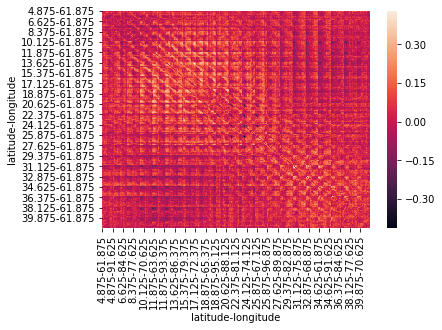

In [40]:
sns.heatmap(mam_sync_matrix - jjas_sync_matrix)

### Post-Monsoon (OND)

In [41]:
# calculate sync and count matrices for OND

ond_sync_matrix, ond_count_matrix, ond_runtime = TRMM.calculate_sync_matrix(ond_extreme_events, 'OND-0.9')
ond_sync_matrix.iloc[:5, :5]

> Loading from cache...


latitude               4.875                                        
longitude             61.875    63.625    65.375    67.125    68.875
latitude longitude                                                  
4.875    61.875     1.000000  0.662857  0.542857  0.462857  0.371429
         63.625     0.662857  1.000000  0.691429  0.571429  0.440000
         65.375     0.542857  0.691429  1.000000  0.668571  0.531429
         67.125     0.462857  0.571429  0.668571  1.000000  0.697143
         68.875     0.371429  0.440000  0.531429  0.697143  1.000000

In [42]:
ond_sync_matrix.isna().sum().sum()

0

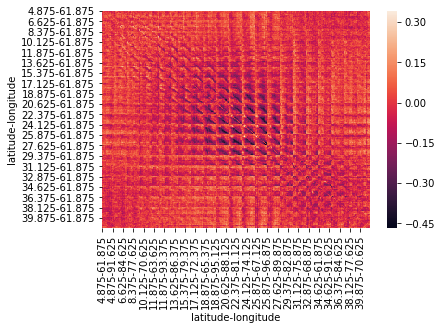

In [43]:
sns.heatmap(jjas_sync_matrix - ond_sync_matrix)

## Building a Climate Network

Generate a graph representation from the above count matrix. Only draw edges for values above the specified quantile.

In [44]:
NETWORK_QUANTILE = 0.9

### Pre-Monsoon (MAM)

In [45]:
mam_graph_counts = TRMM.generate_graph(mam_count_matrix, quantile=NETWORK_QUANTILE)
print(len(mam_graph_counts.nodes), len(mam_graph_counts.edges))
print(np.mean([d['weight'] for (x, y, d) in mam_graph_counts.edges(data=True)]))

441 9621
1.0


In [46]:
mam_graph_counts_w = TRMM.generate_graph(mam_count_matrix, quantile=NETWORK_QUANTILE, set_ge=None)
print(len(mam_graph_counts_w.nodes), len(mam_graph_counts_w.edges))
print(np.mean([d['weight'] for (x, y, d) in mam_graph_counts_w.edges(data=True)]))

441 9621
58.7734123272


In [47]:
mam_graph = TRMM.generate_graph(mam_sync_matrix, quantile=NETWORK_QUANTILE)
print(len(mam_graph.nodes), len(mam_graph.edges))
print(np.mean([d['weight'] for (x, y, d) in mam_graph.edges(data=True)]))

441 9688
1.0


In [48]:
mam_graph_w = TRMM.generate_graph(mam_sync_matrix, quantile=NETWORK_QUANTILE, set_ge=None)
print(len(mam_graph_w.nodes), len(mam_graph_w.edges))
print(np.mean([d['weight'] for (x, y, d) in mam_graph_w.edges(data=True)]))

441 9688
0.425753169565


In [197]:
mam_cent_degree, mam_cent_between, mam_pagerank = TRMM.calculate_centrality(mam_graph)

In [198]:
mam_cent_degree_w, mam_cent_between_w, mam_pagerank_w = TRMM.calculate_centrality(mam_graph_w, weighted=True)

#### Degree

In [199]:
mam_cent_degree.head()

,lat,lon,val,text,val_0to1,val_std
0,4.875,61.875,11,"(4.875, 61.875)=11.0000",0.085366,-2.042759
1,4.875,63.625,17,"(4.875, 63.625)=17.0000",0.158537,-1.670632
2,4.875,65.375,20,"(4.875, 65.375)=20.0000",0.195122,-1.484569
3,4.875,67.125,26,"(4.875, 67.125)=26.0000",0.268293,-1.112442
4,4.875,68.875,32,"(4.875, 68.875)=32.0000",0.341463,-0.740315


In [200]:
mam_cent_degree_w.head()

,lat,lon,val,text,val_0to1,val_std
0,4.875,61.875,5.115942,"(4.875, 61.875)=5.1159",0.091694,-1.920239
1,4.875,63.625,7.971014,"(4.875, 63.625)=7.9710",0.165877,-1.516828
2,4.875,65.375,8.992754,"(4.875, 65.375)=8.9928",0.192425,-1.372460
3,4.875,67.125,11.637681,"(4.875, 67.125)=11.6377",0.261148,-0.998742
4,4.875,68.875,14.231884,"(4.875, 68.875)=14.2319",0.328553,-0.632191


In [201]:
mam_cent_degree.pivot(index='lat', columns='lon', values='val').iloc[:5, :5]

lon,61.875,63.625,65.375,67.125,68.875
lat,,,,,
4.875,11,17,20,26,32
6.625,19,30,30,36,48
8.375,43,51,55,60,63
10.125,79,76,70,75,66
11.875,58,86,80,77,69


In [202]:
mam_cent_degree[['val', 'val_0to1', 'val_std']].describe()

,val,val_0to1,val_std
count,441.000000,441.000000,4.410000e+02
mean,43.936508,0.487031,-3.650393e-17
std,16.123544,0.196629,1.000000e+00
min,4.000000,0.000000,-2.476906e+00
25%,33.000000,0.353659,-6.782943e-01
50%,43.000000,0.475610,-5.808325e-02
75%,54.000000,0.609756,6.241489e-01
max,86.000000,1.000000,2.608824e+00


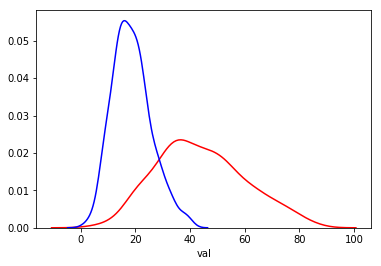

In [203]:
sns.distplot(mam_cent_degree['val'], hist=False, color='r')
sns.distplot(mam_cent_degree_w['val'], hist=False, color='b')

#### Betweenness

In [204]:
mam_cent_between.head()

,lat,lon,val,text,val_0to1,val_std
0,4.875,61.875,0.061174,"(4.875, 61.875)=0.0612",0.000020,-0.824512
1,4.875,63.625,3.454477,"(4.875, 63.625)=3.4545",0.001142,-0.817295
2,4.875,65.375,549.498248,"(4.875, 65.375)=549.4982",0.181685,0.344117
3,4.875,67.125,39.812491,"(4.875, 67.125)=39.8125",0.013164,-0.739963
4,4.875,68.875,73.714773,"(4.875, 68.875)=73.7148",0.024373,-0.667854


In [205]:
mam_cent_between_w.head()

,lat,lon,val,text,val_0to1,val_std
0,4.875,61.875,0.000000,"(4.875, 61.875)=0.0000",0.000000,-0.864159
1,4.875,63.625,0.000000,"(4.875, 63.625)=0.0000",0.000000,-0.864159
2,4.875,65.375,365.250000,"(4.875, 65.375)=365.2500",0.133349,-0.052166
3,4.875,67.125,22.833333,"(4.875, 67.125)=22.8333",0.008336,-0.813397
4,4.875,68.875,97.833333,"(4.875, 68.875)=97.8333",0.035718,-0.646664


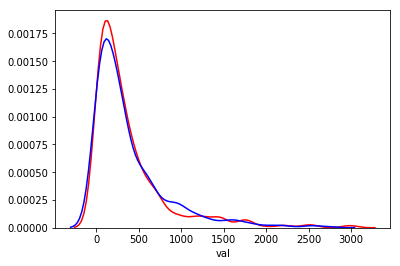

In [206]:
sns.distplot(mam_cent_between['val'], hist=False, color='r')
sns.distplot(mam_cent_between_w['val'], hist=False, color='b')

#### PageRank

In [207]:
mam_pagerank.head()

,lat,lon,val,text,val_0to1,val_std
0,4.875,61.875,0.000861,"(4.875, 61.875)=0.0009",0.088450,-2.393614
1,4.875,63.625,0.001114,"(4.875, 63.625)=0.0011",0.168943,-1.962147
2,4.875,65.375,0.001252,"(4.875, 65.375)=0.0013",0.212674,-1.727735
3,4.875,67.125,0.001553,"(4.875, 67.125)=0.0016",0.308172,-1.215834
4,4.875,68.875,0.001808,"(4.875, 68.875)=0.0018",0.389099,-0.782042


In [208]:
mam_pagerank_w.head()

,lat,lon,val,text,val_0to1,val_std
0,4.875,61.875,0.000899,"(4.875, 61.875)=0.0009",0.097194,-2.336394
1,4.875,63.625,0.001188,"(4.875, 63.625)=0.0012",0.184269,-1.843572
2,4.875,65.375,0.001289,"(4.875, 65.375)=0.0013",0.214673,-1.671491
3,4.875,67.125,0.001574,"(4.875, 67.125)=0.0016",0.300815,-1.183952
4,4.875,68.875,0.001824,"(4.875, 68.875)=0.0018",0.376105,-0.757825


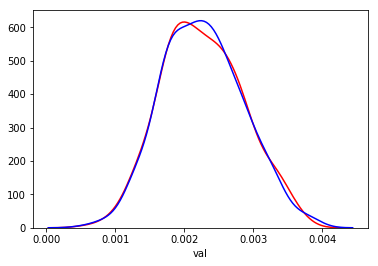

In [209]:
sns.distplot(mam_pagerank['val'], hist=False, color='r')
sns.distplot(mam_pagerank_w['val'], hist=False, color='b')

### Monsoon (JJAS)

In [210]:
jjas_graph = TRMM.generate_graph(jjas_sync_matrix, quantile=NETWORK_QUANTILE)
print(len(jjas_graph.nodes), len(jjas_graph.edges))
print(np.mean([d['weight'] for (x, y, d) in jjas_graph.edges(data=True)]))

441 9665
1.0


In [211]:
jjas_graph_w = TRMM.generate_graph(jjas_sync_matrix, quantile=NETWORK_QUANTILE, set_ge=None)
print(len(jjas_graph_w.nodes), len(jjas_graph_w.edges))
print(np.mean([d['weight'] for (x, y, d) in jjas_graph_w.edges(data=True)]))

441 9665
0.326038090364


In [213]:
jjas_cent_degree, jjas_cent_between, jjas_pagerank = TRMM.calculate_centrality(jjas_graph)

In [215]:
jjas_cent_degree_w, jjas_cent_between_w, jjas_pagerank_w = TRMM.calculate_centrality(jjas_graph_w, weighted=True)

### Post-Monsoon (OND)

In [65]:
ond_graph = TRMM.generate_graph(ond_sync_matrix, quantile=NETWORK_QUANTILE)
print(len(ond_graph.nodes), len(ond_graph.edges))
print(np.mean([d['weight'] for (x, y, d) in ond_graph.edges(data=True)]))

441 9446
1.0


In [66]:
ond_graph_w = TRMM.generate_graph(ond_sync_matrix, quantile=NETWORK_QUANTILE, set_ge=None)
print(len(ond_graph_w.nodes), len(ond_graph_w.edges))
print(np.mean([d['weight'] for (x, y, d) in ond_graph_w.edges(data=True)]))

441 9446
0.403270505326


In [216]:
ond_cent_degree, ond_cent_between, ond_pagerank = TRMM.calculate_centrality(ond_graph)

In [217]:
ond_cent_degree_w, ond_cent_between_w, ond_pagerank_w = TRMM.calculate_centrality(ond_graph_w, weighted=True)

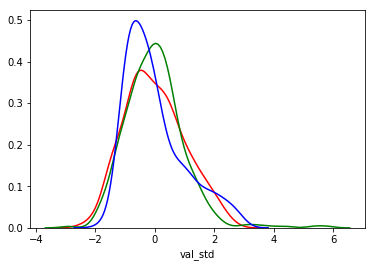

In [221]:
sns.distplot(mam_cent_degree['val_std'], hist=False, color='r')
sns.distplot(jjas_cent_degree['val_std'], hist=False, color='g')
sns.distplot(ond_cent_degree['val_std'], hist=False, color='b')

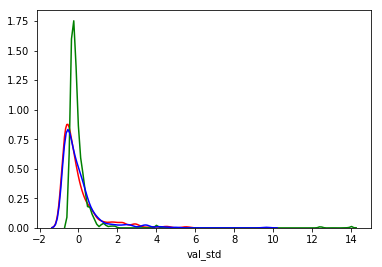

In [225]:
sns.distplot(mam_cent_between['val_std'], hist=False, color='r')
sns.distplot(jjas_cent_between['val_std'], hist=False, color='g')
sns.distplot(ond_cent_between['val_std'], hist=False, color='b')

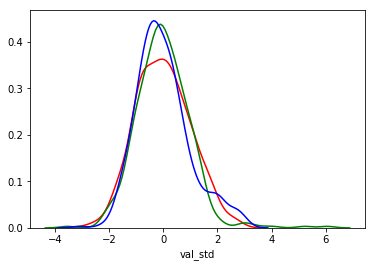

In [223]:
sns.distplot(mam_pagerank_w['val_std'], hist=False, color='r')
sns.distplot(jjas_pagerank_w['val_std'], hist=False, color='g')
sns.distplot(ond_pagerank_w['val_std'], hist=False, color='b')

## Visualizations

In [242]:
# global params for all graphs

graph_params = dict(
    gaussian_filtering=0.0,
    cmap='afmhot_r',
    vis_type='contour'
)

### Pre-Monsoon (MAM)

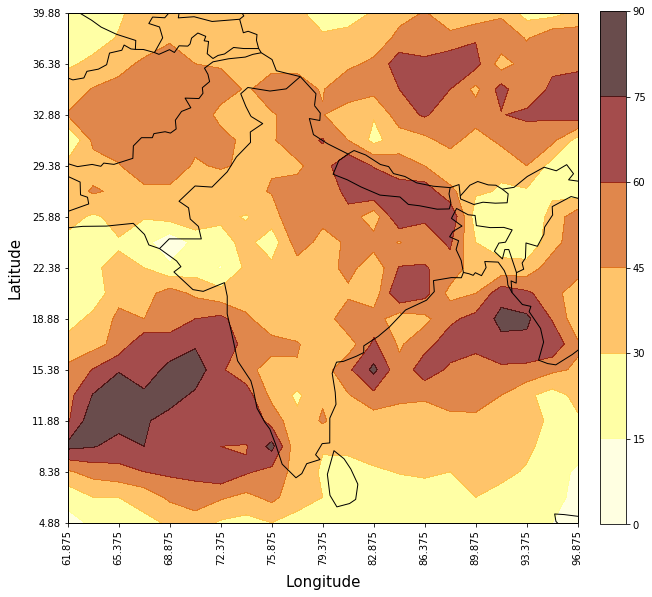

In [243]:
Visualization.create_cartopy_vis(mam_cent_degree, filename='output/sync_1.75_mam_deg.png', **graph_params)

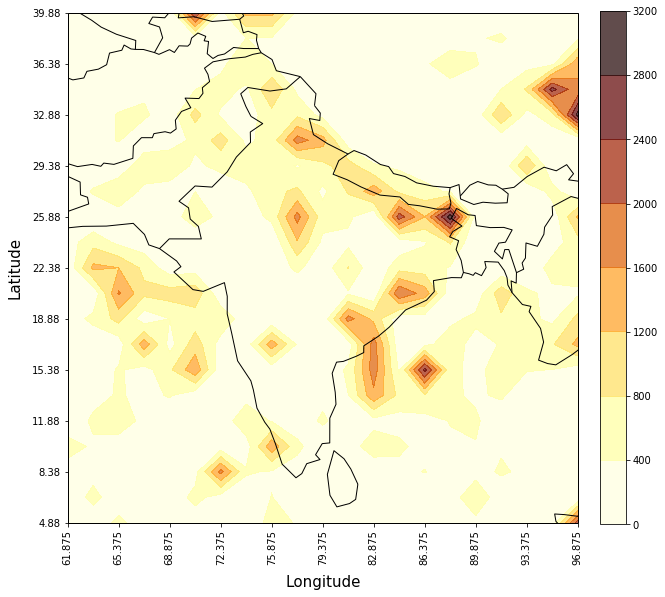

In [254]:
Visualization.create_cartopy_vis(mam_cent_between, filename='output/sync_1.75_mam_btw.png', **graph_params)

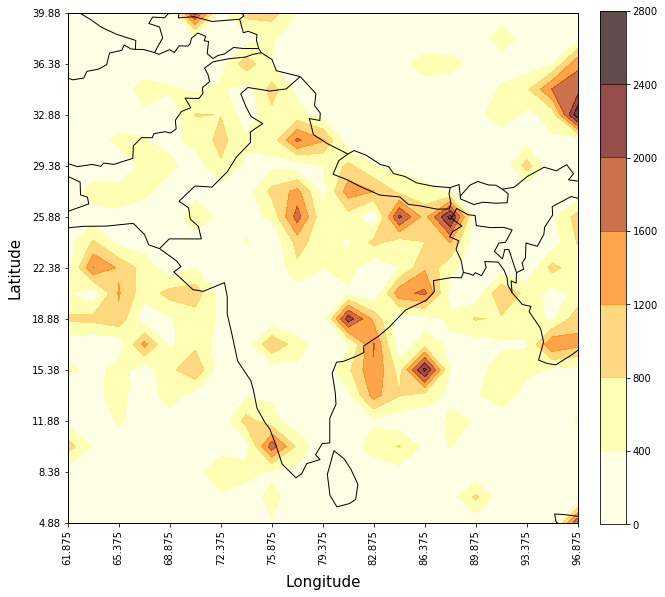

In [249]:
Visualization.create_cartopy_vis(mam_cent_between_w, filename='output/sync_1.75_mam_btw_weighted.png', **graph_params)

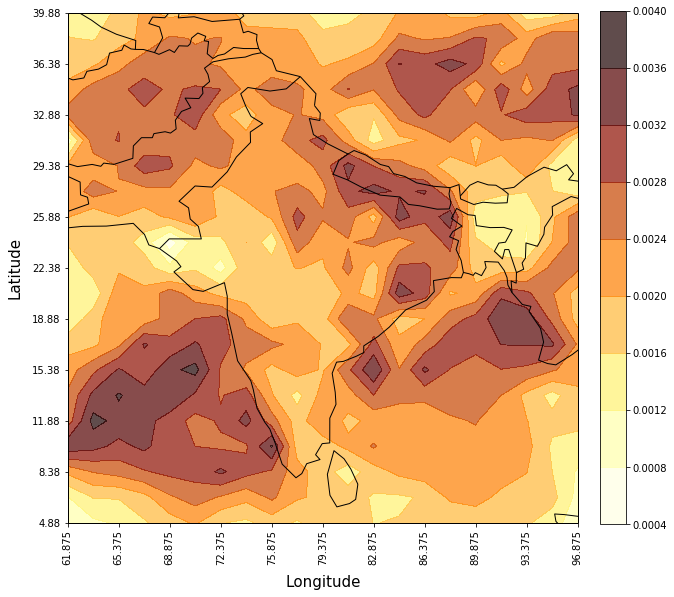

In [246]:
Visualization.create_cartopy_vis(mam_pagerank, filename='output/sync_1.75_mam_pr.png', **graph_params)

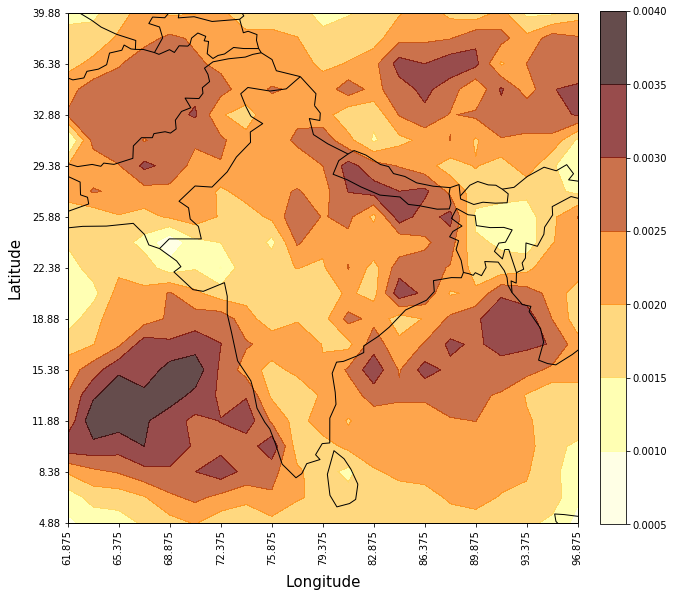

In [247]:
Visualization.create_cartopy_vis(mam_pagerank_w, filename='output/sync_1.75_mam_pr_weighted.png', **graph_params)

### Monsoon (JJAS)

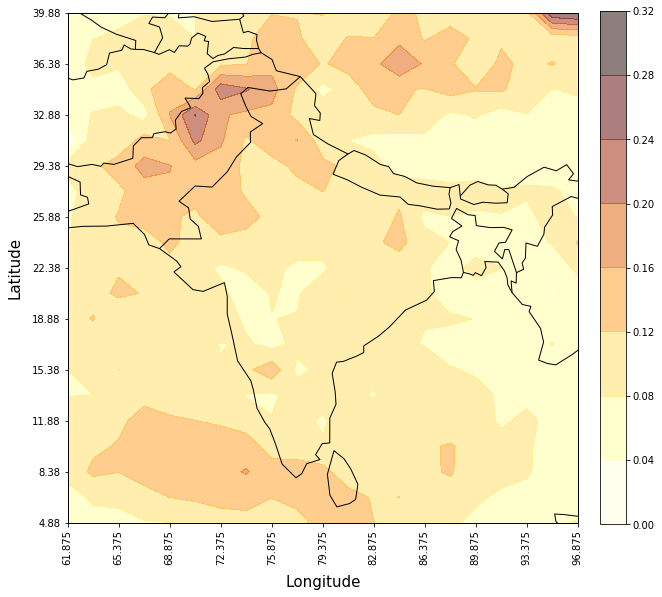

In [126]:
Visualization.create_cartopy_vis(jjas_cent_degree, filename='output/sync_1.75_jjas_deg.png', **graph_params)

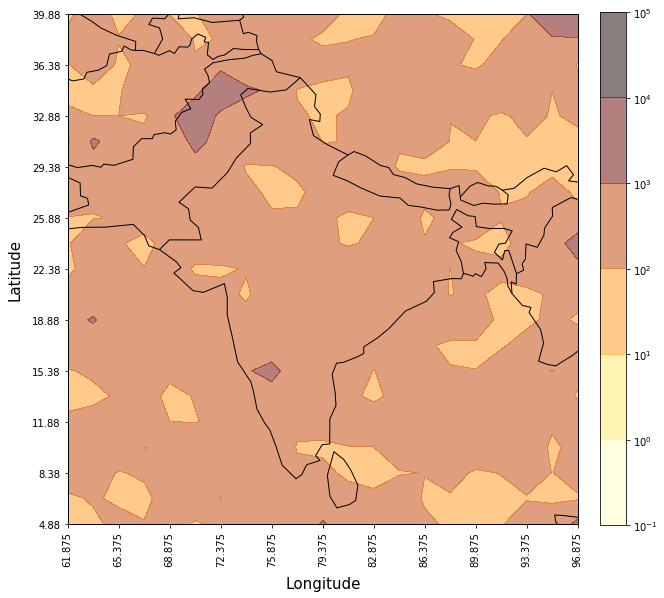

In [127]:
Visualization.create_cartopy_vis(jjas_cent_between, filename='output/sync_1.75_jjas_btw.png', log_norm=True, **graph_params)

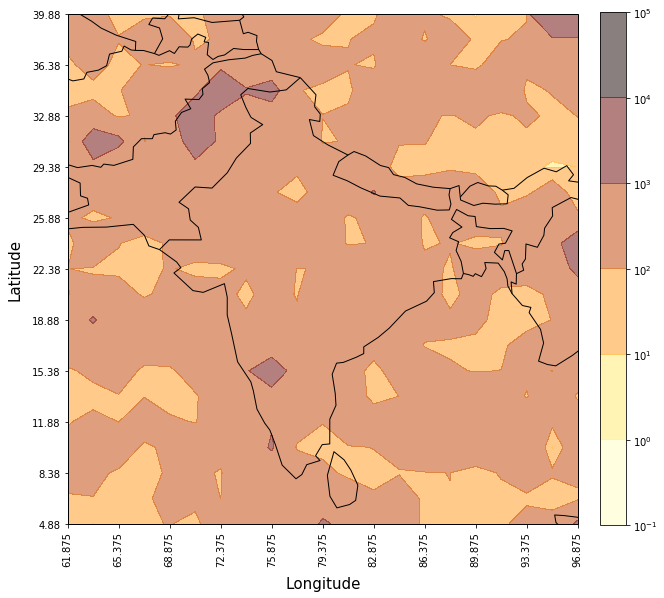

In [128]:
Visualization.create_cartopy_vis(jjas_cent_between_w, filename='output/sync_1.75_jjas_btw_weighted.png', log_norm=True, **graph_params)

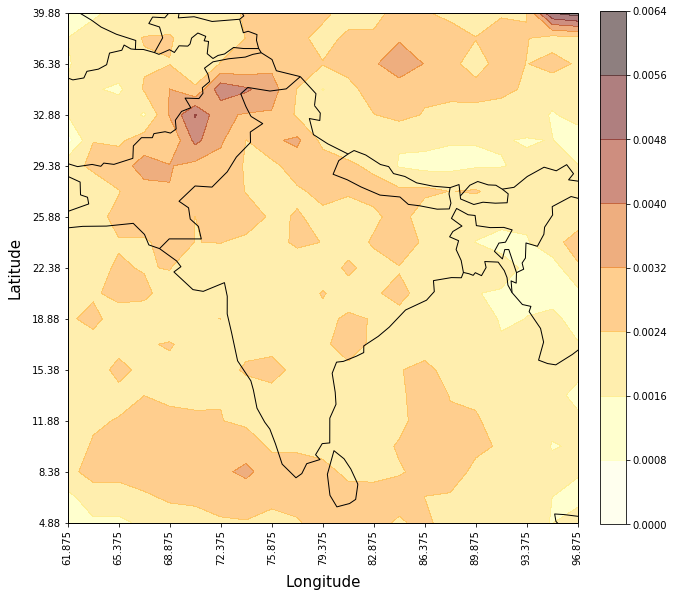

In [129]:
Visualization.create_cartopy_vis(jjas_pagerank, filename='output/sync_1.75_jjas_pr.png', **graph_params)

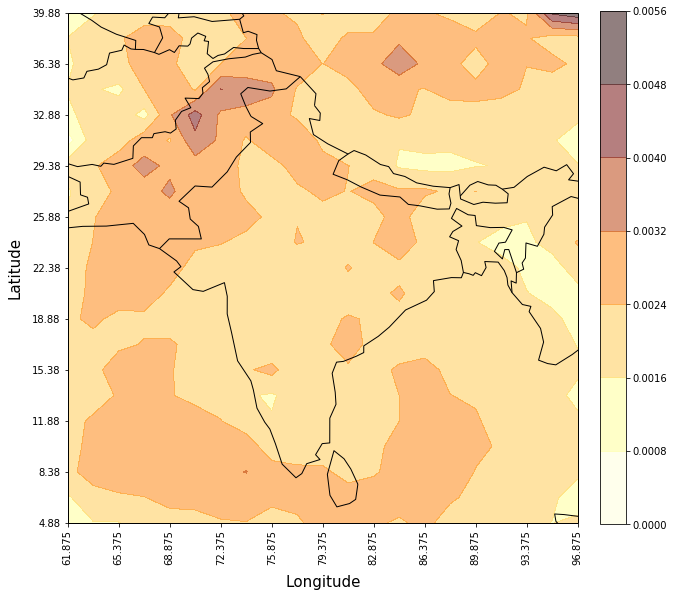

In [130]:
Visualization.create_cartopy_vis(jjas_pagerank_w, filename='output/sync_1.75_jjas_pr_weighted.png', **graph_params)

### Post-Monsoon (OND)

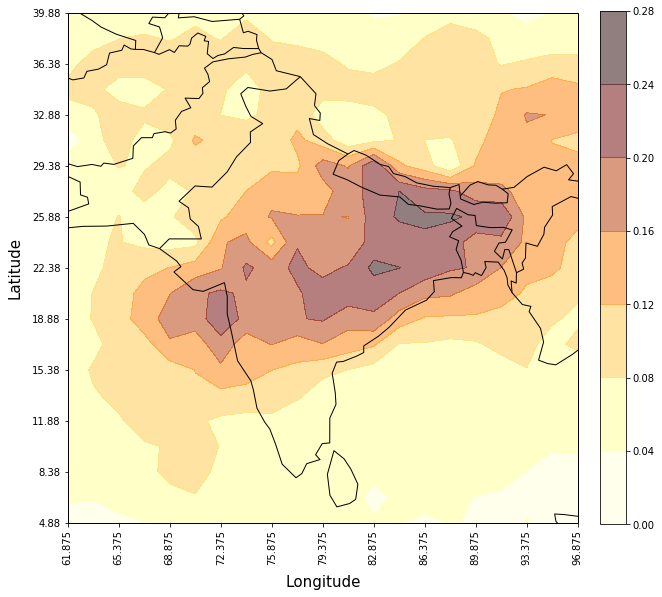

In [131]:
Visualization.create_cartopy_vis(ond_cent_degree, filename='output/sync_1.75_ond_deg.png', **graph_params)

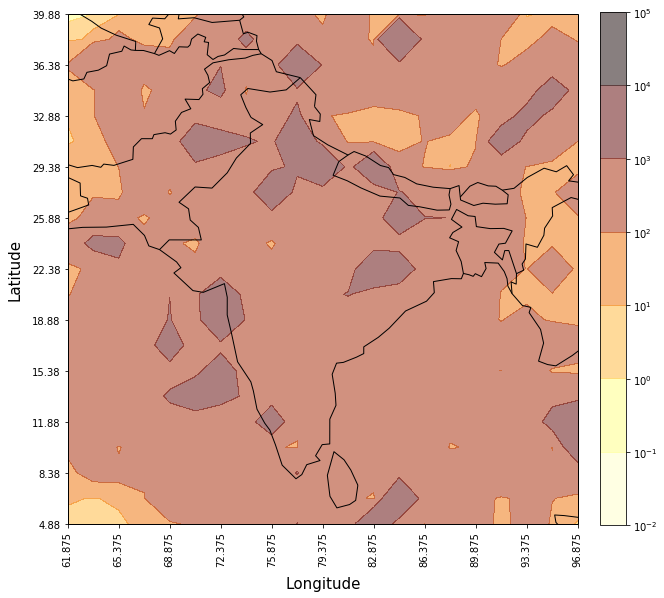

In [139]:
Visualization.create_cartopy_vis(ond_cent_between, filename='output/sync_1.75_ond_btw.png', log_norm=True, **graph_params)

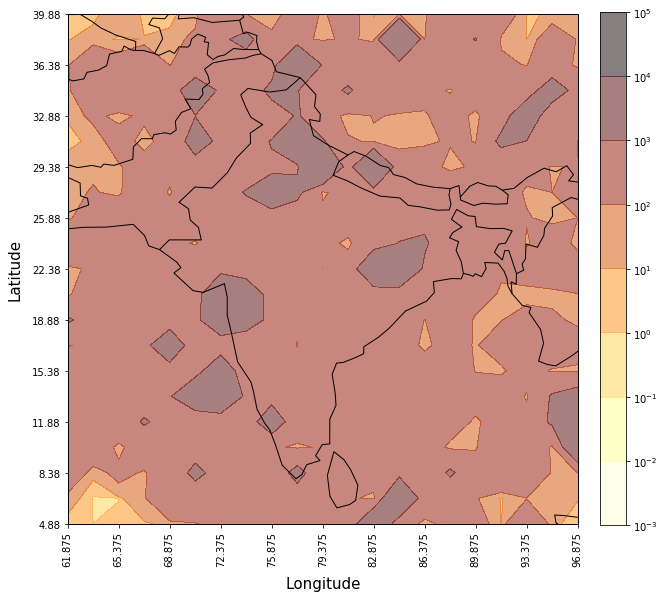

In [138]:
Visualization.create_cartopy_vis(ond_cent_between_w, filename='output/sync_1.75_ond_btw_weighted.png', log_norm=True, **graph_params)

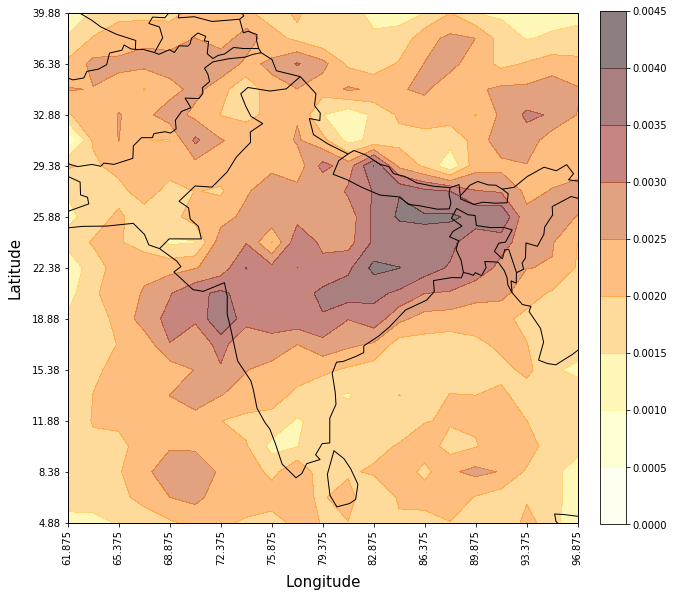

In [133]:
Visualization.create_cartopy_vis(ond_pagerank, filename='output/sync_1.75_ond_pr.png', **graph_params)

### Overview

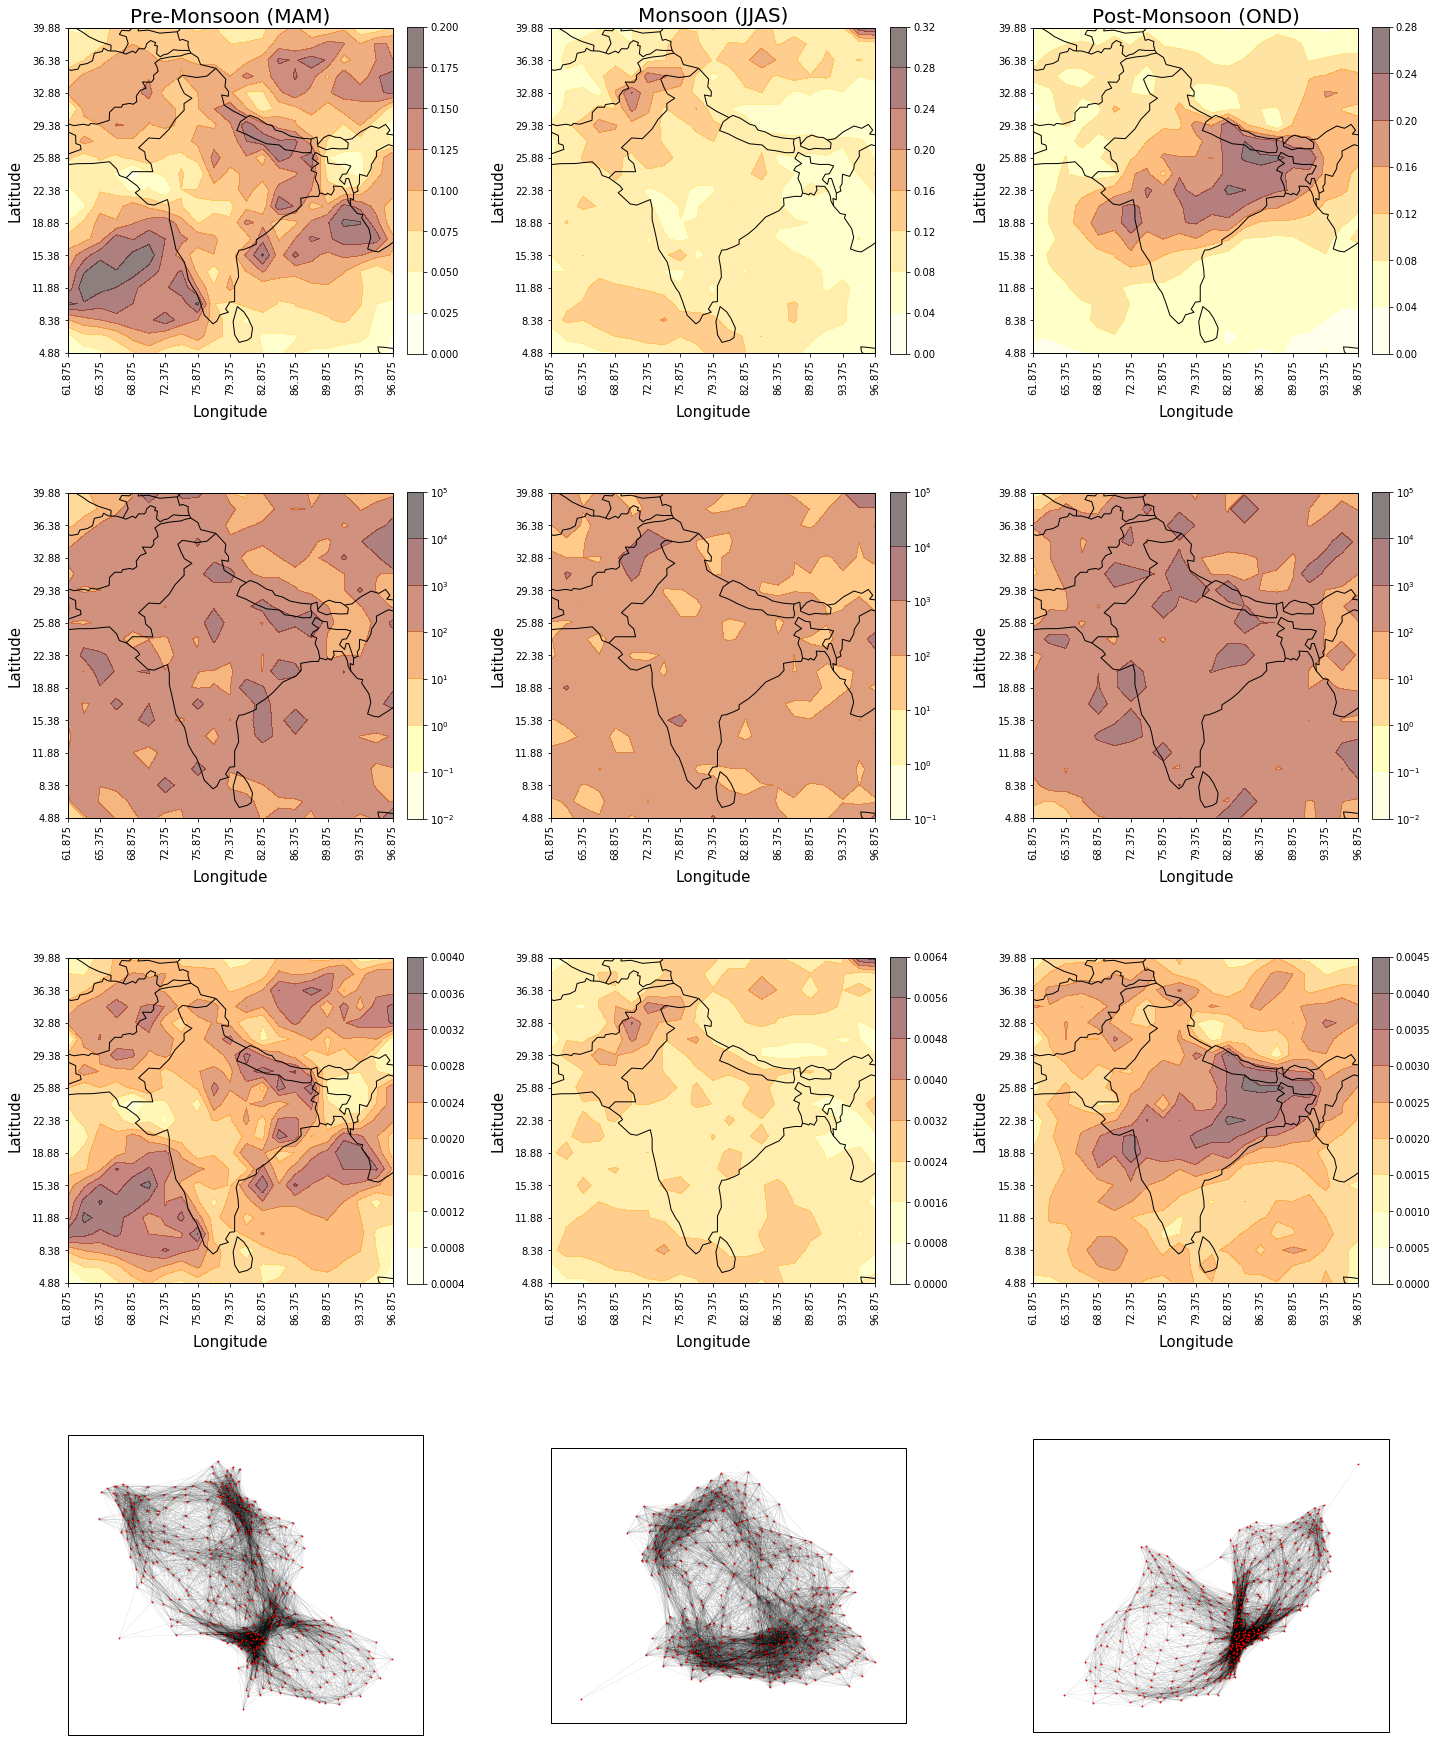

In [137]:
fig, axes = plt.subplots(4, 3, figsize=(20, 25), subplot_kw=dict(projection=ccrs.PlateCarree()))

axes[0, 0].set_title('Pre-Monsoon (MAM)', size=20)
axes[0, 1].set_title('Monsoon (JJAS)', size=20)
axes[0, 2].set_title('Post-Monsoon (OND)', size=20)
# axes[0, 0].set_ylabel('Degree', rotation=0, size=20)
# axes[1, 0].set_ylabel('Betweenness', rotation=0, size=20)
# axes[2, 0].set_ylabel('PageRank', rotation=0, size=20)

Visualization.create_cartopy_vis(mam_cent_degree, ax=axes[0, 0], **graph_params)
Visualization.create_cartopy_vis(jjas_cent_degree, ax=axes[0, 1], **graph_params)
Visualization.create_cartopy_vis(ond_cent_degree, ax=axes[0, 2], **graph_params)

Visualization.create_cartopy_vis(mam_cent_between, ax=axes[1, 0], log_norm=True, **graph_params)
Visualization.create_cartopy_vis(jjas_cent_between, ax=axes[1, 1], log_norm=True, **graph_params)
Visualization.create_cartopy_vis(ond_cent_between, ax=axes[1, 2], log_norm=True, **graph_params)

Visualization.create_cartopy_vis(mam_pagerank, ax=axes[2, 0], **graph_params)
Visualization.create_cartopy_vis(jjas_pagerank, ax=axes[2, 1], **graph_params)
Visualization.create_cartopy_vis(ond_pagerank, ax=axes[2, 2], **graph_params)

nx.draw_spring(mam_graph, ax=axes[3, 0], node_size=0.7, width=0.05)
nx.draw_spring(jjas_graph, ax=axes[3, 1], node_size=0.7, width=0.05)
nx.draw_spring(ond_graph, ax=axes[3, 2], node_size=0.7, width=0.05)

# Visualization.create_cartopy_vis(msl_first, ax=axes[0, 0], title='On 01.03', vis_type='contour', cmap='coolwarm', clabel='hPa')

# supttl = fig.suptitle('Average Mean Sea-Level Pressure (ERA)', size=30)
# supttl.set_position([0.5, 1.02])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig('output/event_sync_1.75-0.9.png', bbox_inches='tight')